<h4> Citations for the data</h4>


Data for the weather components : Open data server of Deutscher Wetterdienst (<a>https://opendata.dwd.de/climate_environment/CDC/</a>) <br/>
Data for the tidal heights and water level : B&uuml;ndesanstalt f&uuml;r Gew&auml;esserkunde–BfG (<a>https://www.bafg.de/DE/Home/homepage_node.html</a>)


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h1> Extract Water levels and Dates <h1>

In [4]:
file=open('Bremerhaven/bremenhaven.bsh')
data=file.readlines()
file.close()
file2=open("Bremerhaven/Vegesack-Tnw+Thw.bsh")
data2=file2.readlines()
file2.close()
date_extractor=lambda t: (t[0:10])

waterlevel_extractor=lambda t: (float(t[18:22]))

dates=[date_extractor(date) for date in data]

waterlevel=[waterlevel_extractor(tide) for tide in data]

waterlevel_vegesack=[waterlevel_extractor(w) for w in data2]
dates_vegesack=[date_extractor(date) for date in data2]

waterlevel_df = pd.DataFrame(
    {'date': dates,
     'Water Level': waterlevel
    })
waterlevel_df_vegesack = pd.DataFrame(
    {'date': dates_vegesack,
     'Water Level': waterlevel_vegesack
    })
dates=[dates[i] for i in range(0,len(dates),4)]
dates_formatted=[int(date[6:]+date[3:5]+date[:2]) for date in dates]
high_waterlevel_df=waterlevel_df.groupby('date')['Water Level'].max()
low_waterlevel_df=waterlevel_df.groupby('date')['Water Level'].min()


high_waterlevel_df_vegesack=waterlevel_df_vegesack.groupby('date')["Water Level"].max()
low_waterlevel_df_vegesack=waterlevel_df_vegesack.groupby('date')["Water Level"].min()


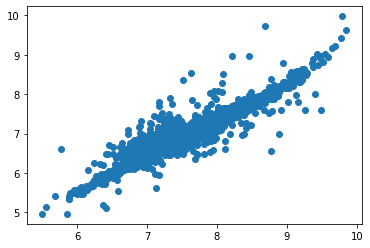

In [5]:
plt.scatter(high_waterlevel_df_vegesack.values,high_waterlevel_df.values)


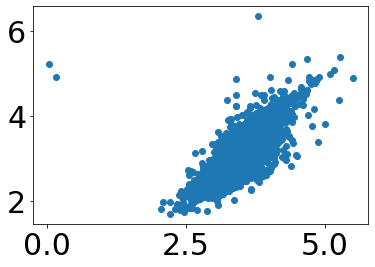

In [ ]:
plt.scatter(low_waterlevel_df_vegesack.values,low_waterlevel_df.values)


<h1> Extracting tidal heights<h1>

In [6]:
file=open('Bremerhaven/tidaldata.bsh')
data=file.readlines()
file.close()
tidal_date_extractor=lambda t: (t[0:10])

tidal_extractor=lambda t: (float(t[18:22]))

dates_tidal=[tidal_date_extractor(date) for date in data]

tidal_heights=[tidal_extractor(tide) for tide in data]


tidal_df = pd.DataFrame(
    {'date': dates_tidal,
     'tidal heights': tidal_heights
    })

# print(tidal_df['tidal heights'])
low_tidal_df=tidal_df.groupby('date')['tidal heights'].min()
high_tidal_df=tidal_df.groupby('date')['tidal heights'].max()

print(len(low_tidal_df))
print(len(high_tidal_df))

7671
7671


<h1> Data Analysis <h1>

In [31]:
def analysedata(filepath):
  result=dict()
  df=pd.read_csv(filepath,sep=';')
  start=df[df["MESS_DATUM"]==20000101].index[0]
  stop=df[df["MESS_DATUM"]==20201231].index[0]

  ppt=df[" RSK"][start:(stop+1)].to_numpy()
  meanwind=df["  FM"][start:stop+1].to_numpy()
  maxwindgust=df["  FX"][start:stop+1].to_numpy()
  meanwind=df["  FM"][start:stop+1].to_numpy()
  meantemp=df[" TMK"][start:stop+1].to_numpy()
  vappressure=df[" VPM"][start:stop+1].to_numpy()
  sdepth=df["SHK_TAG"][start:stop+1].to_numpy()
  rhumidity=df[" UPM"][start:stop+1].to_numpy()
  meanpressure=df["  PM"][start:stop+1].to_numpy()
  cloudcover=df["  NM"][start:stop+1].to_numpy()
  date=df["MESS_DATUM"][start:stop+1].to_numpy()


  result["place"]=filepath[12:-4]
  result["lengthofdata"]=len(ppt)

  missingdates=set(dates_formatted)-set(date)

  result["missing_rain"]=np.count_nonzero(ppt==-999)
  result["missing_dates"]=missingdates
  result["missing_dates_count"]=len(missingdates)
  result["missing_mean_wind"]=np.count_nonzero(meanwind==-999)
  result["missing_max_wind_gust"]=np.count_nonzero(maxwindgust==-999)
  result["missing_mean_temp"]=np.count_nonzero(meantemp==-999)
  result["missing_vapour_pressure"]=np.count_nonzero(vappressure==-999)
  result["missing_snow_depth"]=np.count_nonzero(sdepth==-999)
  result["missing_relative_humidity"]=np.count_nonzero(rhumidity==-999)
  result["missing_mean_pressure"]=np.count_nonzero(meanpressure==-999)
  result["missing_cloud_cover"]=np.count_nonzero(cloudcover==-999)
  result["missing_relative_humidity"]=np.count_nonzero(rhumidity==-999)

  return result


bremendata=analysedata("Bremerhaven/bremen.txt")#good
bremervordedata=analysedata("Bremerhaven/bremervorde.txt")#good
hamburgdata=analysedata("Bremerhaven/hamburg.txt")#good
worpswerdedata=analysedata("Bremerhaven/worpswerde.txt")#good
nordholzdata=analysedata("Bremerhaven/nordholz.txt")#good
wittmundhafendata=analysedata("Bremerhaven/wittmundhafen.txt")#good

<h1>Keeping Available Data <h1>

In [32]:
threshold=1000
def choosecols(filepath):
  takencols=["MESS_DATUM"]
  res=analysedata(filepath)
  if res["missing_rain"]<threshold:
    takencols.append("Precipitation Height/(mm)")
  if res["missing_mean_wind"]<threshold:
    takencols.append("Mean Wind Speed/(m/s)")
  if res["missing_max_wind_gust"]<threshold:
    takencols.append("Max Wind Gust/(m/s)")
  if res["missing_mean_temp"]<threshold:
    takencols.append("Mean Temperature/(C)")
  if res["missing_vapour_pressure"]<threshold:
    takencols.append("Vapour Pressure/(hPa)")
  if res["missing_snow_depth"]<threshold:

    takencols.append("Snow Depth/(cm)")
  if res["missing_relative_humidity"]<threshold:
    takencols.append("Relative Humidity/(%)")
  if res["missing_mean_pressure"]<threshold:
    takencols.append("Mean Pressure/(hPa)")
  if res["missing_cloud_cover"]<threshold:
    takencols.append("Cloud Cover/(oktas)")
  return takencols


bremencols=choosecols("Bremerhaven/bremen.txt")
bremervordecols=choosecols("Bremerhaven/bremervorde.txt")
hamburgcols=choosecols("Bremerhaven/hamburg.txt")
nordholzcols=choosecols("Bremerhaven/nordholz.txt")
wittmundhafencols=choosecols("Bremerhaven/wittmundhafen.txt")
worpswerdecols=choosecols("Bremerhaven/worpswerde.txt")

<h1>Renaming Colums and Data Cleaning <h1>

In [33]:
def renamecols(filepath):
  df=pd.read_csv(filepath,sep=';')
  df.rename(columns={'  FX':'Max Wind Gust/(m/s)',
                     '  FM':'Mean Wind Speed/(m/s)',
                     ' RSK':'Precipitation Height/(mm)',
                     ' TMK':'Mean Temperature/(C)',
                     '  PM':'Mean Pressure/(hPa)',
                     ' VPM':'Vapour Pressure/(hPa)',
                     'SHK_TAG':'Snow Depth/(cm)',
                     ' UPM':'Relative Humidity/(%)',
                     '  NM':'Cloud Cover/(oktas)'}, inplace=True)
  return df

bremen_df=renamecols("Bremerhaven/bremen.txt")
bremervorde_df=renamecols("Bremerhaven/bremervorde.txt")
hamburg_df=renamecols("Bremerhaven/hamburg.txt")
nordholz_df=renamecols("Bremerhaven/nordholz.txt")
wittmundhafen_df=renamecols("Bremerhaven/wittmundhafen.txt")
worpswerde_df=renamecols("Bremerhaven/worpswerde.txt")

def takecols(df,feat):
    start=df[df["MESS_DATUM"]==20000101].index[0]
    stop=df[df["MESS_DATUM"]==20201231].index[0]
    df=df.iloc[start:stop+1]
    idx=[i for i in range(len(df))]
    new_df=df[feat].copy()
    new_df["idx"]=idx
    new_df=new_df.set_index('idx')
    # new_df["waterlevel"]=wlevels
    new_df=new_df.replace(-999,np.nan)
    return(new_df)

bremen_df_scols=takecols(bremen_df,bremencols)
bremervorde_df_scols=takecols(bremervorde_df,bremervordecols)
hamburg_df_scols=takecols(hamburg_df,hamburgcols)
nordholz_df_scols=takecols(nordholz_df,nordholzcols)
wittmundhafen_df_scols=takecols(wittmundhafen_df,wittmundhafencols)
worpswerde_df_scols=takecols(worpswerde_df,worpswerdecols)




In [34]:
bremen_df_scols_imp=bremen_df_scols.interpolate(method ='linear', limit_direction ='forward')
bremervorde_df_scols_imp=bremervorde_df_scols.interpolate(method ='linear', limit_direction ='forward')
hamburg_df_scols_imp=hamburg_df_scols.interpolate(method ='linear', limit_direction ='forward')
nordholz_df_scols_imp=nordholz_df_scols.interpolate(method ='linear', limit_direction ='forward')
wittmundhafen_df_scols_imp=wittmundhafen_df_scols.interpolate(method ='linear', limit_direction ='forward')
worpswerde_df_scols_imp=worpswerde_df_scols.interpolate(method ='linear', limit_direction ='forward')


<h1> Creating dataframes: With and Without tidal heights<h1>

In [36]:
df_concat_cols = pd.concat([bremen_df_scols_imp, bremervorde_df_scols_imp,hamburg_df_scols_imp,nordholz_df_scols_imp,wittmundhafen_df_scols_imp,worpswerde_df_scols_imp], axis=1)
dates=(df_concat_cols.pop("MESS_DATUM"))
df_mean_cols=df_concat_cols.groupby(by=df_concat_cols.columns, axis=1).mean()

df_mean_cols_tidal_high=df_mean_cols.copy()
df_mean_cols_tidal_low=df_mean_cols.copy()
df_mean_cols_vegesack=df_mean_cols.copy()

df_mean_cols["High Water Level/(m)"]=high_waterlevel_df.values


df_mean_cols_tidal_high["High Tidal Height/(m)"]=high_tidal_df.values
df_mean_cols_tidal_high["High Water Level/(m)"]=high_waterlevel_df.values

df_mean_cols_tidal_low["Low Tidal Height/(m)"]=low_tidal_df.values
df_mean_cols_tidal_low["Low Water Level/(m)"]=low_waterlevel_df.values

df_mean_cols_vegesack["High Wlevel Vegesack/(m)"]=high_waterlevel_df_vegesack.values
df_mean_cols_vegesack["High Water Level/(m)"]=high_waterlevel_df.values


<h1> Train Test Split<h1>

In [37]:
from sklearn.model_selection import train_test_split
def create_test_train(df,target):
  df_features= df.drop([target],axis=1)
  df_target = pd.DataFrame(df[target], columns=[target])
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, shuffle=False,stratify=None)

  x_train=x_train.reset_index(drop=True)
  x_test=x_test.reset_index(drop=True)
  y_train=y_train.reset_index(drop=True)
  y_test=y_test.reset_index(drop=True)
  return x_train,x_test,y_train,y_test

x_simple_train,x_simple_test,y_simple_train,y_simple_test=create_test_train(df_mean_cols,"High Water Level/(m)") 

#with tidal high
x_high_train,x_high_test,y_high_train,y_high_test=create_test_train(df_mean_cols_tidal_high,"High Water Level/(m)")

#with tidal low
x_low_train,x_low_test,y_low_train,y_low_test=create_test_train(df_mean_cols_tidal_low,"Low Water Level/(m)")

#with vegesack high
x_veg_train,x_veg_test,y_veg_train,y_veg_test=create_test_train(df_mean_cols_vegesack,"High Water Level/(m)")

<h1>Standardize Data<h1>

In [39]:
#standardize the training set
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def standardize_data(x_train,x_test,y_train,y_test,target):
  feature_columns =list(set(x_train.keys().values.tolist()))
  featcols=np.asarray(feature_columns)
  # for feature data
  x_train_standardize = x_train[feature_columns].copy()
  x_test_standardize = x_test[feature_columns].copy()

  # Create the scaler object
  scaler = StandardScaler()
  # Fit the data to scaler
  scaler.fit(x_train_standardize)
  x_train_scaled = scaler.transform(x_train_standardize)
  x_test_scaled = scaler.transform(x_test_standardize)
  df_standardized_x_train = pd.DataFrame(x_train_scaled, columns = x_train_standardize.columns)
  df_standardized_x_test = pd.DataFrame(x_test_scaled, columns = x_test_standardize.columns)
  target_columns = [target]

  y_train_standardize = y_train[target_columns].copy()
  y_test_standardize = y_test[target_columns].copy()

  # Create the scaler object
  scaler = StandardScaler()
  # Fit the data to scaler
  scaler.fit(y_train_standardize)
  y_train_scaled = scaler.transform(y_train_standardize)
  y_test_scaled = scaler.transform(y_test_standardize)
  df_standardized_y_train = pd.DataFrame(y_train_scaled, columns = y_train_standardize.columns)
  df_standardized_y_test = pd.DataFrame(y_test_scaled, columns = y_test_standardize.columns)

  return(df_standardized_x_train,df_standardized_x_test,df_standardized_y_train,df_standardized_y_test,scaler)




<h1> Datasets ready to train !<h1>

simple

In [40]:
x_simple_train_standard,x_simple_test_standard,y_simple_train_standard,y_simple_test_standard,scaler_simple=standardize_data(x_simple_train,x_simple_test,y_simple_train,y_simple_test,"High Water Level/(m)")

with tidal high

In [42]:
x_high_train_standard,x_high_test_standard,y_high_train_standard,y_high_test_standard,scaler_high=standardize_data(x_high_train,x_high_test,y_high_train,y_high_test,"High Water Level/(m)")

with tidal low

In [44]:
x_low_train_standard,x_low_test_standard,y_low_train_standard,y_low_test_standard,scaler_low=standardize_data(x_low_train,x_low_test,y_low_train,y_low_test,"Low Water Level/(m)")


with vegesack high

In [45]:
x_veg_train_standard,x_veg_test_standard,y_veg_train_standard,y_veg_test_standard,scaler_veg=standardize_data(x_veg_train,x_veg_test,y_veg_train,y_veg_test,"High Water Level/(m)")

<h1> Linear Regression Model <h1>

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
def fitLRmodel(x_train,x_test,y_train,y_test):
  reg= LinearRegression()
  reg.fit(x_train, y_train)
  pred_test_regression=reg.predict(x_test)
  pred_train_regression=reg.predict(x_train)
  r2score=reg.score(x_test, y_test)
  test_error=np.sqrt(mean_squared_error(y_test,pred_test_regression))
  train_error=np.sqrt(mean_squared_error(y_train,pred_train_regression))
  return pred_test_regression,pred_train_regression,train_error,test_error,r2score

In [48]:
def convert_to_real(scaler,y_train_standard,y_test_standard,prediction_test_standard,prediction_train_standard):
  y_train_inv=scaler.inverse_transform(y_train_standard.values.reshape(1,-1))
  y_test_inv=scaler.inverse_transform(y_test_standard.values.reshape(1,-1))
  y_pred_test_inv=scaler.inverse_transform(prediction_test_standard)
  y_pred_train_inv=scaler.inverse_transform(prediction_train_standard)
  return y_train_inv,y_test_inv,y_pred_test_inv,y_pred_train_inv

In [49]:
def plotresults(actual,predicted):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 30})
  plt.plot(actual.flatten(),'b',marker='.',label="true")
  plt.plot(predicted.flatten(),'r',marker='.',label="predicted")
  plt.ylabel("Water Level/(m)")
  plt.xlabel("Days")
  plt.legend(prop={'size':25})

<h1> Training Process <h1>

In [50]:
pred_test_simple,pred_train_simple,error_train_simple,error_test_simple,r2score_simple=fitLRmodel(x_simple_train_standard,x_simple_test_standard,y_simple_train_standard,y_simple_test_standard)
y_train_simple_inv,y_test_simple_inv,y_pred_test_simple_inv,y_pred_train_simple_inv=convert_to_real(scaler_simple,y_simple_train_standard,y_simple_test_standard,pred_test_simple,pred_train_simple)

0.9989669244281555 0.9288220726648372 -0.005594882606141605


In [28]:
print(r2_score(y_test_simple_inv.flatten(),y_pred_test_simple_inv.flatten()))

-0.005594882606141827


In [51]:
etestm=np.sqrt(mean_squared_error(y_test_simple_inv.flatten(),y_pred_test_simple_inv.flatten()))

etrainm=np.sqrt(mean_squared_error(y_train_simple_inv.flatten(),y_pred_train_simple_inv.flatten()))
print(etestm)
print(etrainm)



0.3676812319306012
0.3954486012351773


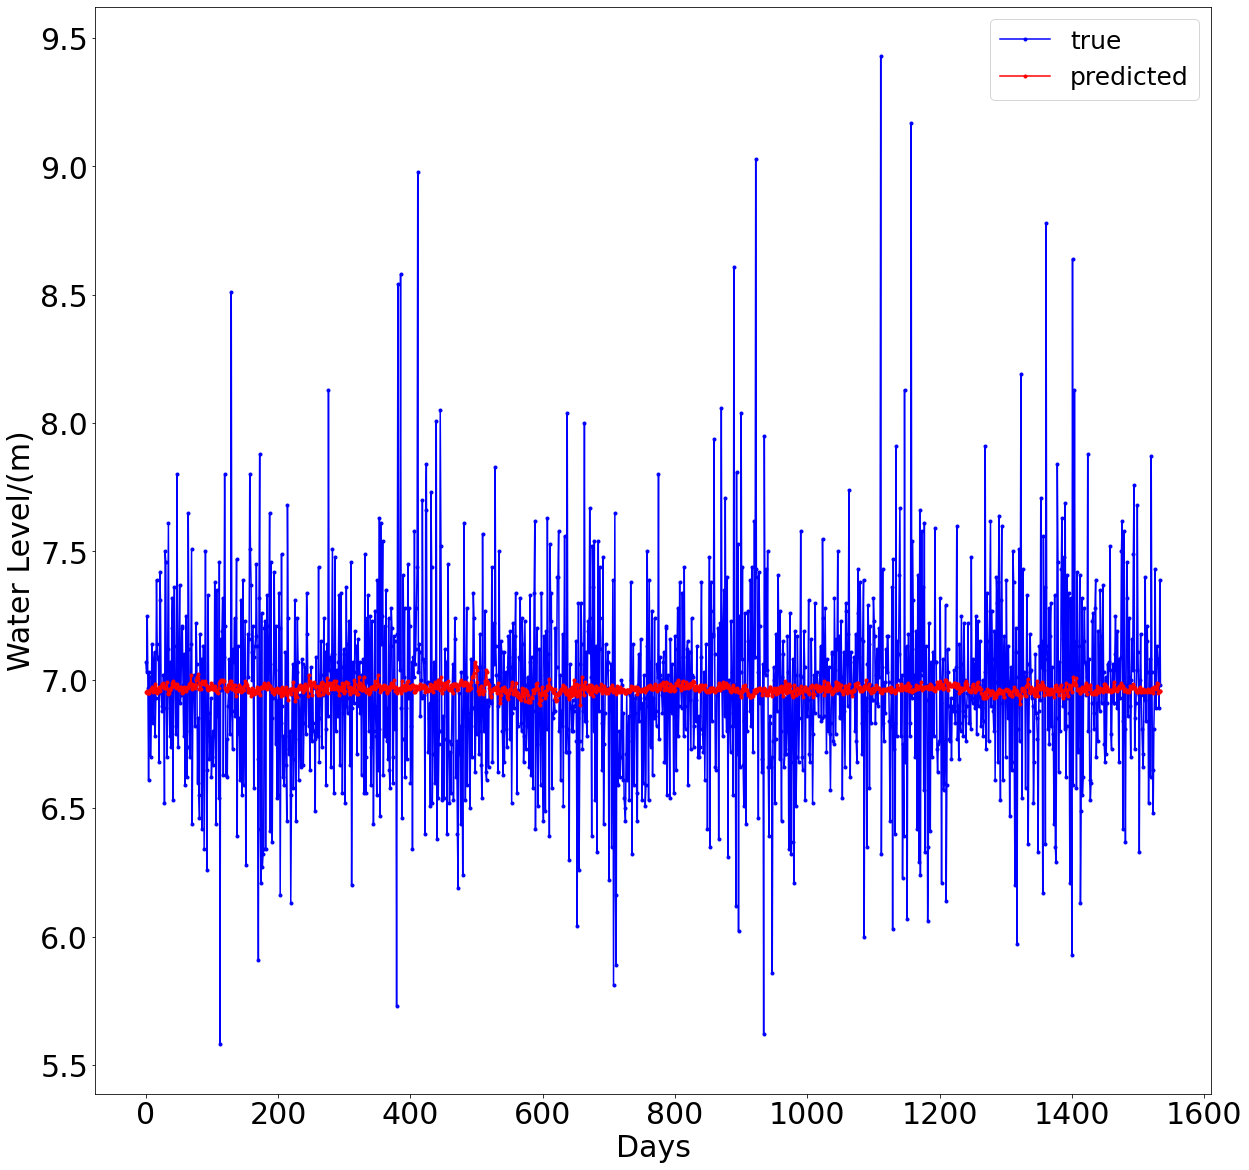

In [52]:
plotresults(y_test_simple_inv,y_pred_test_simple_inv)


In [53]:
pred_test_hightidal,pred_train_hightidal,error_train_hightidal,error_test_hightidal,r2score_hightidal=fitLRmodel(x_high_train_standard,x_high_test_standard,y_high_train_standard,y_high_test_standard)
y_train_hightidal_inv,y_test_hightidal_inv,y_pred_test_hightidal_inv,y_pred_train_hightidal_inv=convert_to_real(scaler_high,y_high_train_standard,y_high_test_standard,pred_test_hightidal,pred_train_hightidal)
print(error_train_hightidal,error_test_hightidal,r2score_hightidal)

0.29136364931379827 0.24796318732790845 0.9283308225776745


In [55]:
etestm_2=np.sqrt(mean_squared_error(y_test_hightidal_inv.flatten(),y_pred_test_hightidal_inv.flatten()))

etrainm_2=np.sqrt(mean_squared_error(y_train_hightidal_inv.flatten(),y_pred_train_hightidal_inv.flatten()))

print(etestm_2,etrainm_2)

0.09815810032225923 0.11533850095975293


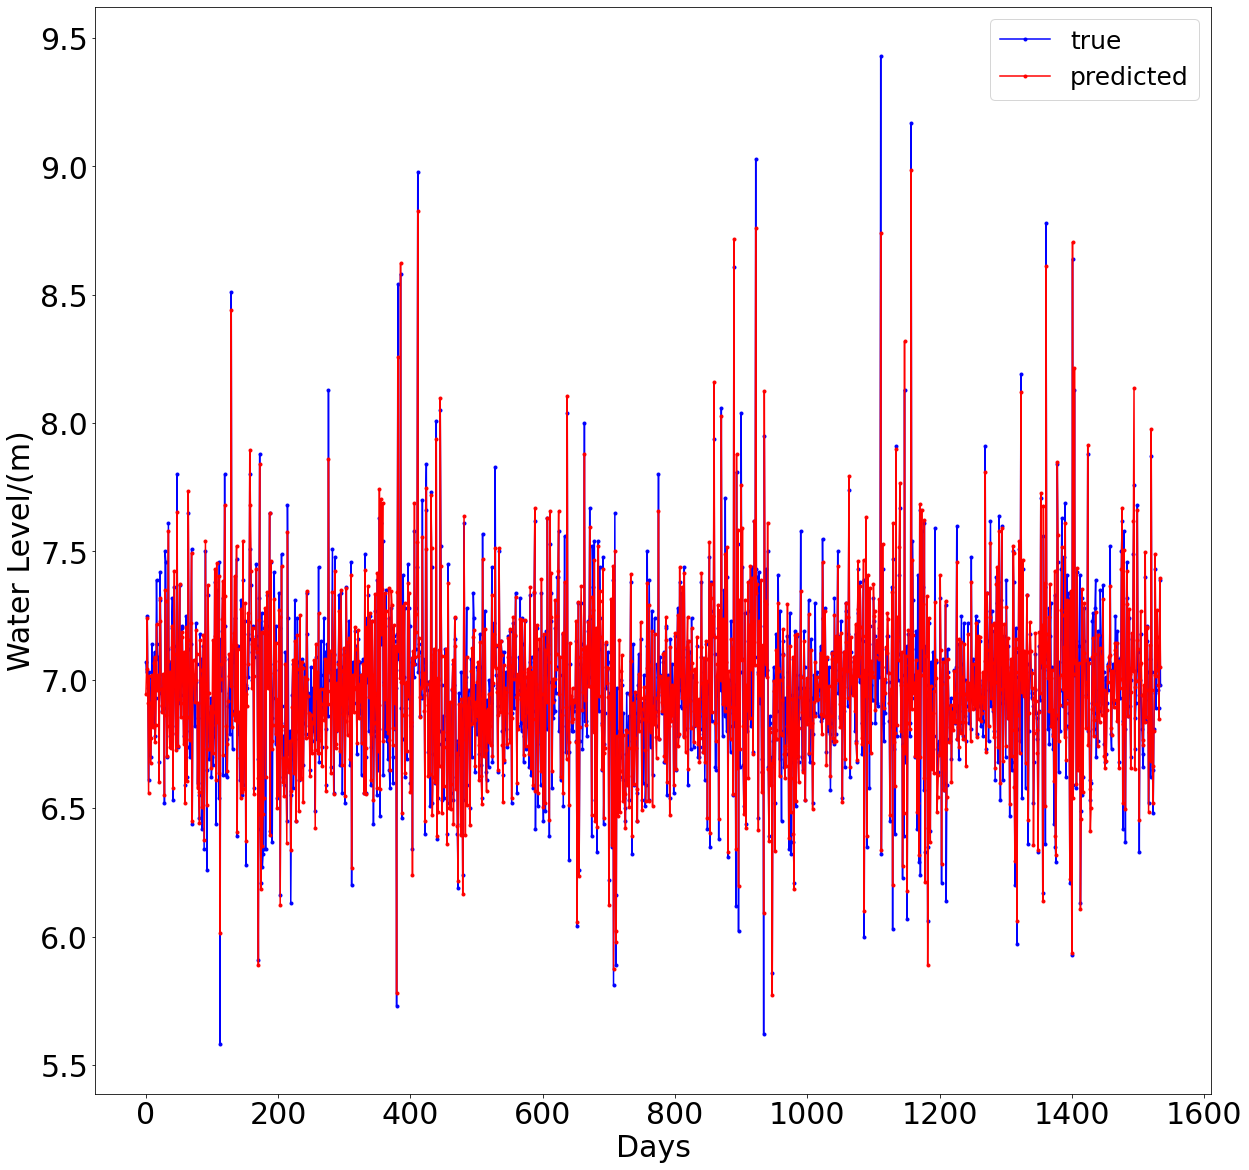

In [57]:
plotresults(y_test_hightidal_inv,y_pred_test_hightidal_inv)
# plt.savefig("Results/LR-highidaldata")

In [58]:
pred_test_veg,pred_train_veg,error_train_veg,error_test_veg,r2score_veg=fitLRmodel(x_veg_train_standard,x_veg_test_standard,y_veg_train_standard,y_veg_test_standard)
y_train_veg_inv,y_test_veg_inv,y_pred_test_veg_inv,y_pred_train_veg_inv=convert_to_real(scaler_veg,y_veg_train_standard,y_veg_test_standard,pred_test_veg,pred_train_veg)
print(error_train_veg,error_test_veg,r2score_veg)

0.33065968778419913 0.2922307678502153 0.900457194195309


In [59]:
etestm_3=np.sqrt(mean_squared_error(y_test_veg_inv.flatten(),y_pred_test_veg_inv.flatten()))

etrainm_3=np.sqrt(mean_squared_error(y_train_veg_inv.flatten(),y_pred_train_veg_inv.flatten()))

print(etestm_3,etrainm_3)

0.1156817563808746 0.1308941345520254


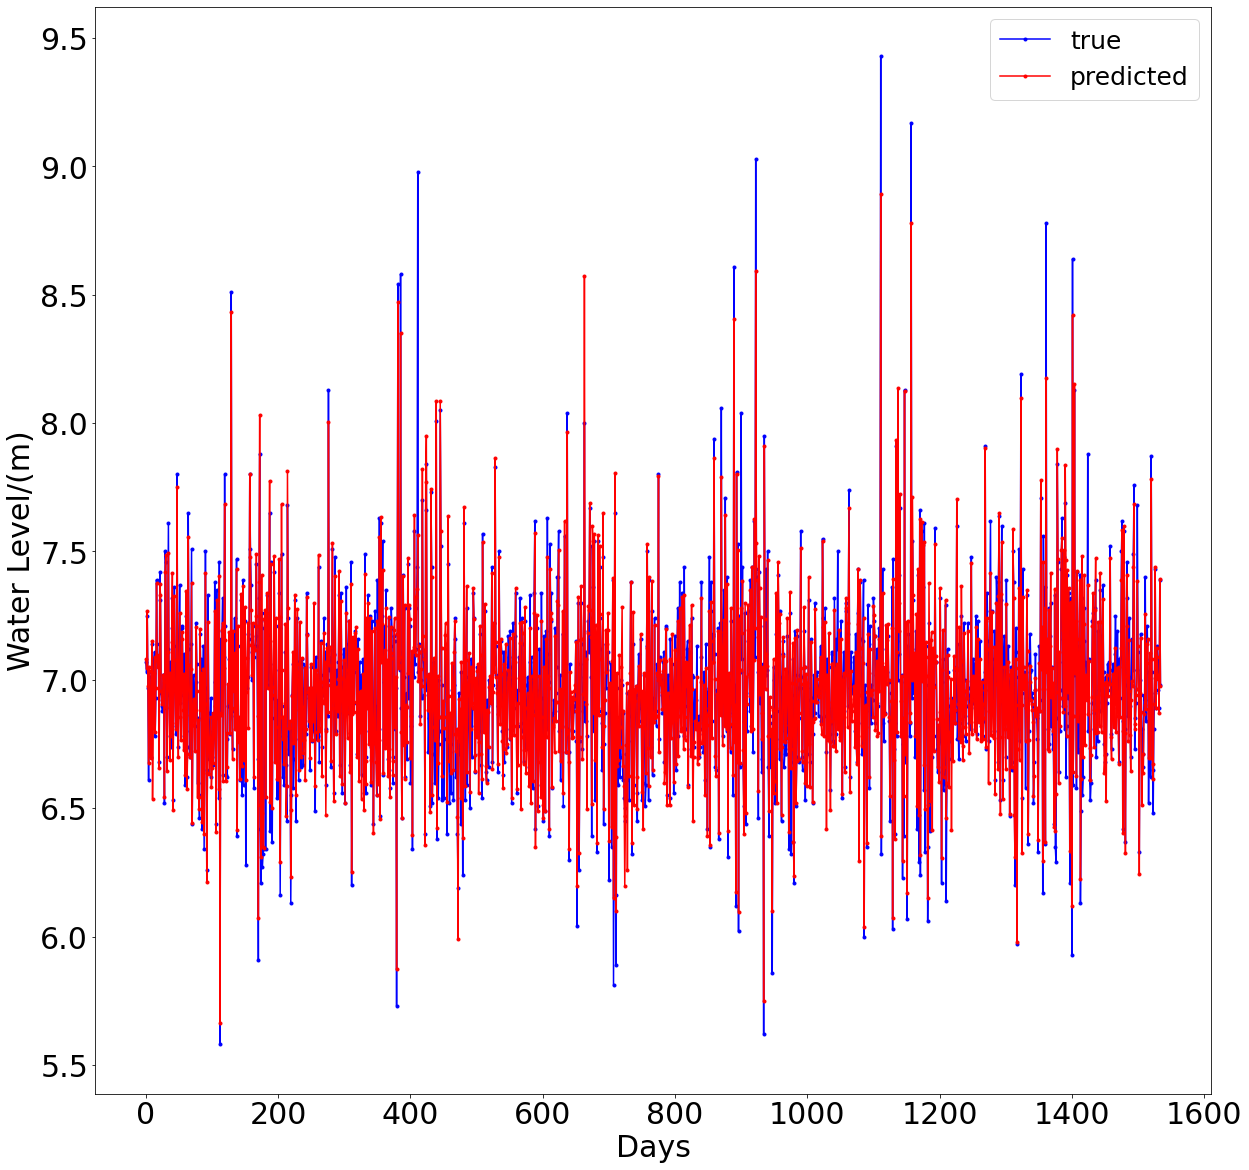

In [61]:
plotresults(y_test_veg_inv,y_pred_test_veg_inv)
# plt.savefig("Results/LR-vegesack-data")

In [62]:
pred_test_lowtidal,pred_train_lowtidal,error_train_lowtidal,error_test_lowtidal,r2score_lowtidal=fitLRmodel(x_low_train_standard,x_low_test_standard,y_low_train_standard,y_low_test_standard)
y_train_lowtidal_inv,y_test_lowtidal_inv,y_pred_test_lowtidal_inv,y_pred_train_lowtidal_inv=convert_to_real(scaler_low,y_low_train_standard,y_low_test_standard,pred_test_lowtidal,pred_train_lowtidal)
print(error_train_lowtidal,error_test_lowtidal,r2score_lowtidal)

0.25885905840357265 0.28326568098008553 0.9093857381344331


In [63]:
etestm_4=np.sqrt(mean_squared_error(y_test_lowtidal_inv.flatten(),y_pred_test_lowtidal_inv.flatten()))

etrainm_4=np.sqrt(mean_squared_error(y_train_lowtidal_inv.flatten(),y_pred_train_lowtidal_inv.flatten()))

print(etestm_4,etrainm_4)

0.11342536237412137 0.1036524523608395


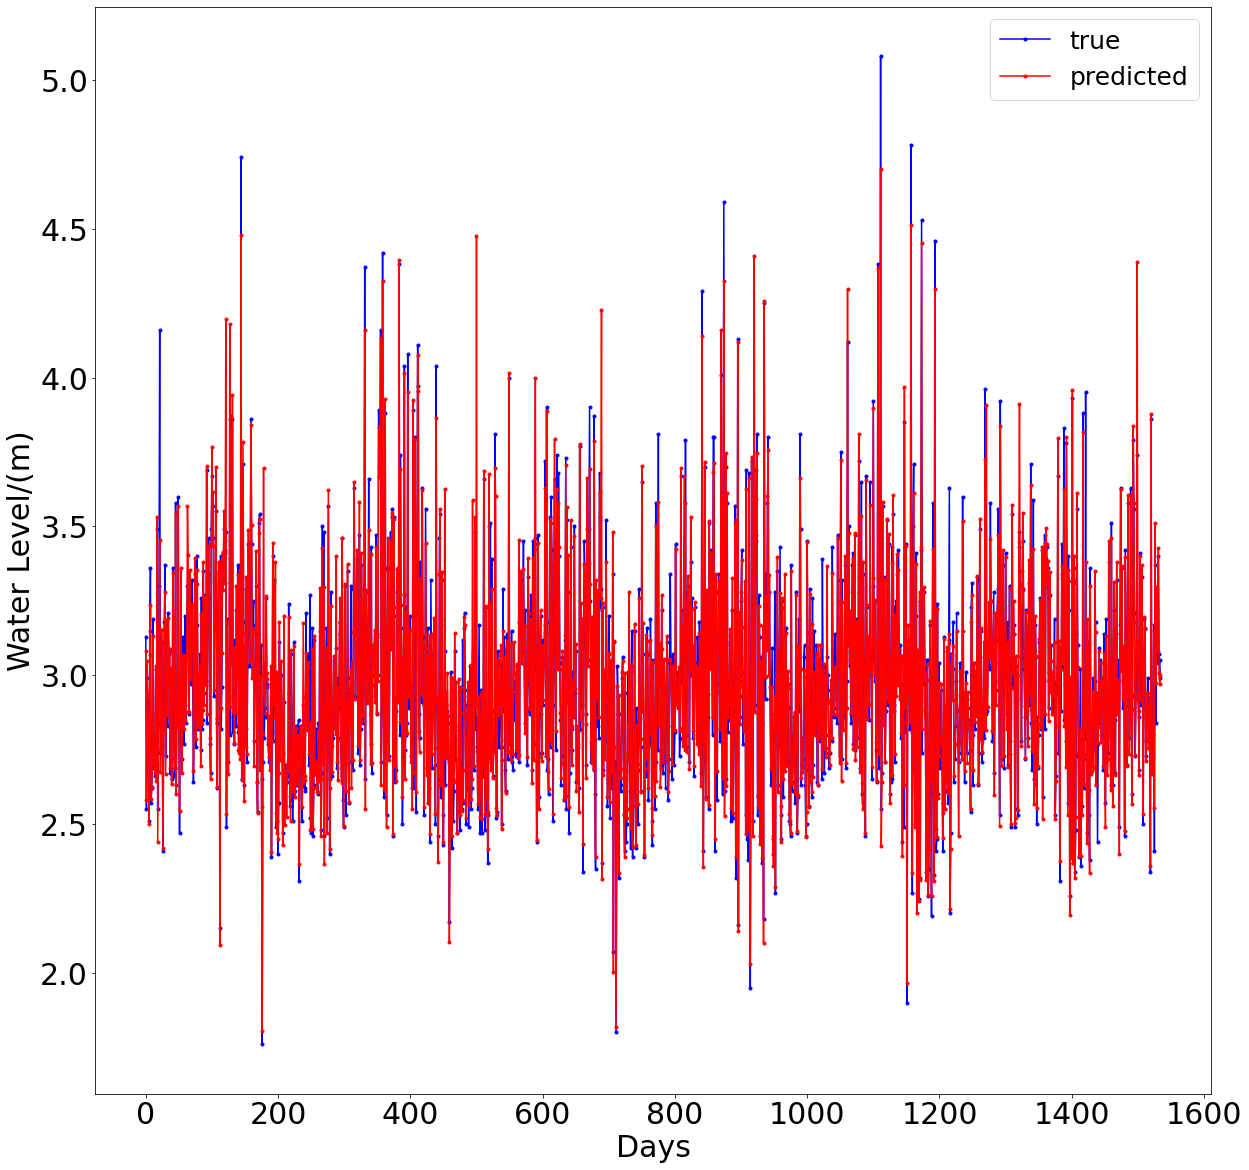

In [65]:
plotresults(y_test_lowtidal_inv,y_pred_test_lowtidal_inv)
# plt.savefig("Results/LR-lowtidaldata")